In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='ReLU', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='ReLU'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='ReLU'))

model.add(layers.Flatten(name="flattenlayer"))
model.add(layers.Dense(64, activation='ReLU'))
model.add(layers.Dense(10))

In [5]:
# 1. Train CNN on MNIST with learning rate 1e-3 and for 10-20 epochs.

lr = 1e-3
n_epochs = 10

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=n_epochs, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1484 - accuracy: 0.9541 - val_loss: 0.0591 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0406 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0317 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0300 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0318 -

In [6]:
# extract features
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

features = extractor.predict(train_images)

[0.10206357 0.09101348]


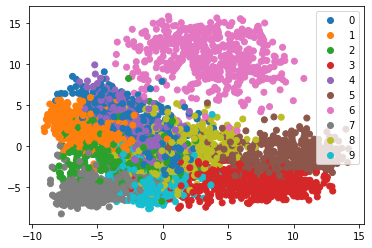

In [7]:
# PCA
pca = PCA(n_components = 2)
pca.fit(features)
print(pca.explained_variance_ratio_)


transformed_data = pca.transform(features[:5000])
from matplotlib.colors import ListedColormap
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])
values = []
i = 0
for point, label in zip(transformed_data, train_labels):
    print(f"[{i}]/[{len(transformed_data)}]", end="\r", flush=True)
    value = (label)
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

C:\Users\fanta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\fanta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'MNIST data t-SNE projection')]

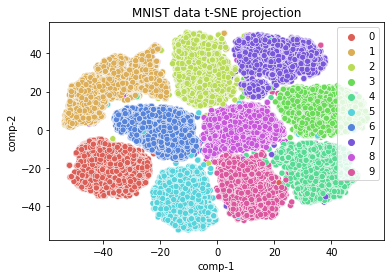

In [8]:
# t-SNE

tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(features)
df = pd.DataFrame()
df["y"] = train_labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1",y="comp-2",hue=df.y.tolist(), 
                palette= sns.color_palette("hls",10), 
                data=df).set(title="MNIST data t-SNE projection")